## Replication of McDonalds Case Study in Python 
## Presented by Shreya Prasad

IMPORTING THE LIBRARIES OR DATA ANALYSIS AND VISUALIZATION

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


Importing the data by providing the path to McDonald's dataset 

In [81]:
# Importing necessary libraries
import pandas as pd

# Reading the CSV file
data = pd.read_csv("C:\\Users\\sp125\\OneDrive\\Desktop\\feynn docs\\Replication-of-McDonalds-Case-Study-in-Python\\mcdonalds.csv")


Exploring the first 5 elements of the dataset

In [82]:

# Displaying the first few rows of the DataFrame
data.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


In [83]:
# Displaying concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [84]:
#data.isna().sum()
#data.isnull().sum()

In [85]:
# Check for missing values using isna()
missing_values = data.isna().sum()

# Alternative method to check for missing values using isnull()
# missing_values = data.isnull().sum()

# Display the total number of missing values for each column
print(missing_values)


yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [86]:
data['yummy'].value_counts()
data['convenient'].value_counts()
data['fattening'].value_counts()
data['greasy'].value_counts()
data['fast'].value_counts()
data['cheap'].value_counts()
data['tasty'].value_counts()
data['expensive'].value_counts()
data['healthy'].value_counts()
data['disgusting'].value_counts()

disgusting
No     1100
Yes     353
Name: count, dtype: int64

In [87]:
# Columns for which value counts are required
columns = ['yummy', 'convenient', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Iterate over each column and print its value counts
for col in columns:
    print(data[col].value_counts())


yummy
Yes    803
No     650
Name: count, dtype: int64
convenient
Yes    1319
No      134
Name: count, dtype: int64
fattening
Yes    1260
No      193
Name: count, dtype: int64
greasy
Yes    765
No     688
Name: count, dtype: int64
fast
Yes    1308
No      145
Name: count, dtype: int64
cheap
Yes    870
No     583
Name: count, dtype: int64
tasty
Yes    936
No     517
Name: count, dtype: int64
expensive
No     933
Yes    520
Name: count, dtype: int64
healthy
No     1164
Yes     289
Name: count, dtype: int64
disgusting
No     1100
Yes     353
Name: count, dtype: int64


In [88]:
data["yummy"] = data["yummy"].replace({'Yes':1, 'No':0})
data["convenient"] = data["convenient"].replace({'Yes':1, 'No':0})
data["spicy"] = data["spicy"].replace({'Yes':1, 'No':0})
data["fattening"] = data["fattening"].replace({'Yes':1, 'No':0})
data["greasy"] = data["greasy"].replace({'Yes':1, 'No':0})
data["fast"] = data["fast"].replace({'Yes':1, 'No':0})
data["cheap"] = data["cheap"].replace({'Yes':1, 'No':0})
data["tasty"] = data["tasty"].replace({'Yes':1, 'No':0})
data["expensive"] = data["expensive"].replace({'Yes':1, 'No':0})
data["healthy"] = data["healthy"].replace({'Yes':1, 'No':0})
data["disgusting"] = data["disgusting"].replace({'Yes':1, 'No':0})

C:\Users\sp125\AppData\Local\Temp\ipykernel_15780\2104972879.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["yummy"] = data["yummy"].replace({'Yes':1, 'No':0})
C:\Users\sp125\AppData\Local\Temp\ipykernel_15780\2104972879.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["convenient"] = data["convenient"].replace({'Yes':1, 'No':0})
C:\Users\sp125\AppData\Local\Temp\ipykernel_15780\2104972879.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the o

In [89]:
# Columns for which replacement is required
columns_to_replace = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Replacement dictionary
replacement_dict = {'Yes': 1, 'No': 0}

# Iterate over each column and perform replacement
for col in columns_to_replace:
    data[col] = data[col].replace(replacement_dict)


In [90]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [91]:
data1 = data.iloc[:,0:11]
data1.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
5,1,1,0,1,0,1,1,1,0,0,0
6,1,1,1,1,0,1,0,1,1,1,0
7,1,1,0,1,1,1,1,1,0,0,0
8,0,0,0,1,1,0,0,0,1,0,1
9,1,1,0,1,1,1,0,1,1,0,0


In [92]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#sc_df = sc.fit_transform(data1)

In [93]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
sc = StandardScaler()

# Fit and transform the data using StandardScaler
sc_df = sc.fit_transform(data1)


In [94]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=11)
#princ_compo = pca.fit_transform(sc_df)
#pca_df = pd.DataFrame(data=princ_compo, columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9", "PCA10", "PCA11",])
#pca_df.head()

In [95]:
from sklearn.decomposition import PCA
import pandas as pd

# Initialize PCA with 11 components
pca = PCA(n_components=11)

# Fit and transform the standardized data using PCA
princ_compo = pca.fit_transform(sc_df)

# Create DataFrame from principal components
pca_df = pd.DataFrame(data=princ_compo, columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9", "PCA10", "PCA11"])

# Display the first few rows of the DataFrame
pca_df.head(10)


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144
5,-1.611088,-0.546626,-0.434235,-0.741550,0.206557,0.465167,0.671111,-0.401152,-0.451211,0.159923,0.082956
6,-1.162820,2.554323,-0.081259,2.758296,-1.257602,0.454271,0.330374,-1.611138,0.291112,0.161685,-0.251076
7,-1.074743,-0.819610,-1.214468,-0.078911,0.894950,-0.092274,0.055646,0.574769,0.242037,0.129561,0.020773
8,4.566454,1.227881,1.245089,-0.163407,2.298765,0.363442,0.309906,-0.469046,0.198857,-0.029066,0.080847
9,0.122070,1.537454,-1.852180,-0.238391,-0.061907,-0.491465,0.105498,0.577937,0.348401,0.068196,0.056023


<Axes: xlabel='PCA1', ylabel='PCA2'>

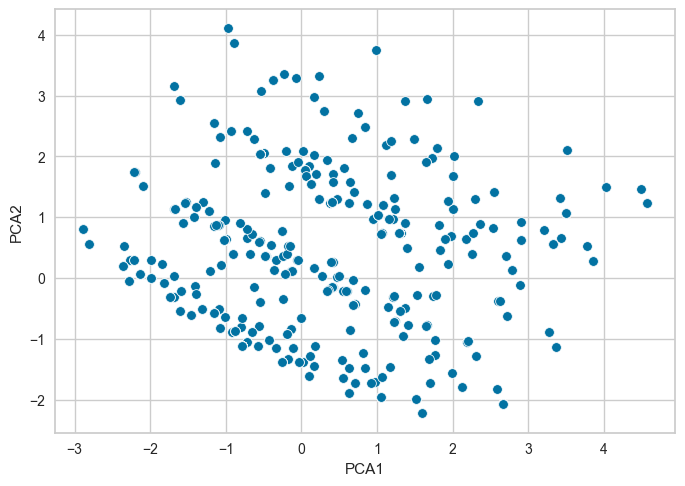

In [96]:
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2")

<Axes: >

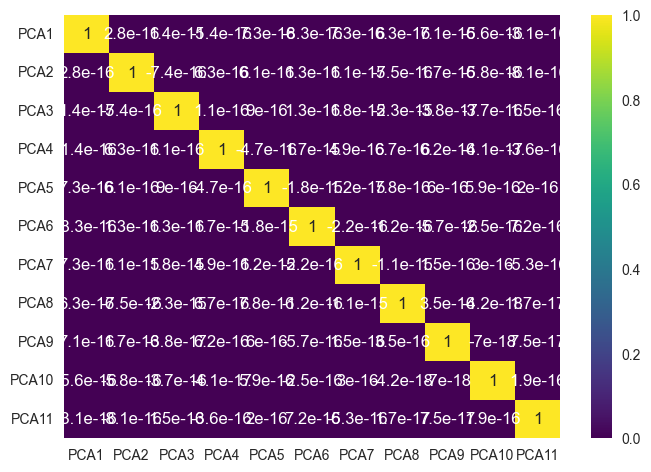

In [97]:
# Create a heatmap of the principal components with the "viridis" colormap
sns.heatmap(pca_df.corr(), annot=True, cmap='viridis')


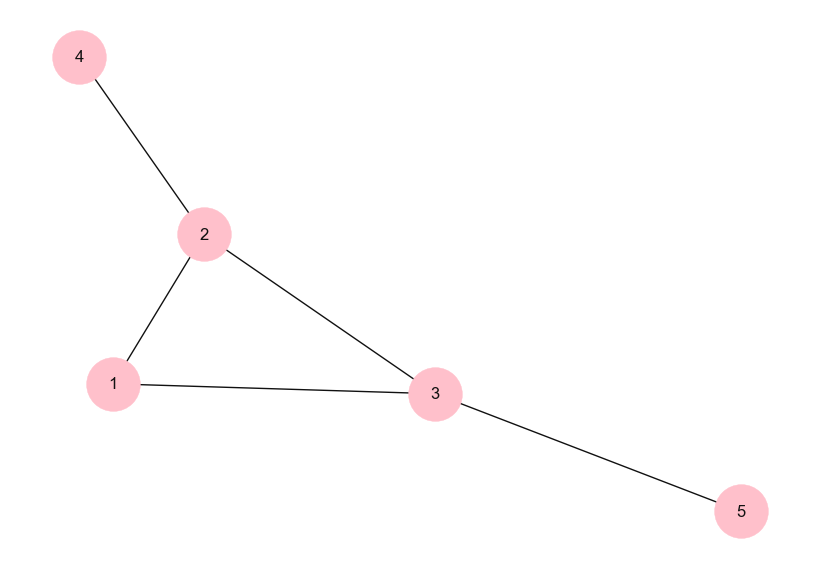

In [98]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4, 5])

# Add edges
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (3, 5)])

# Draw the graph
nx.draw(G, with_labels=True, node_color='pink', node_size=1500, font_size=12)

# Show the plot
plt.show()


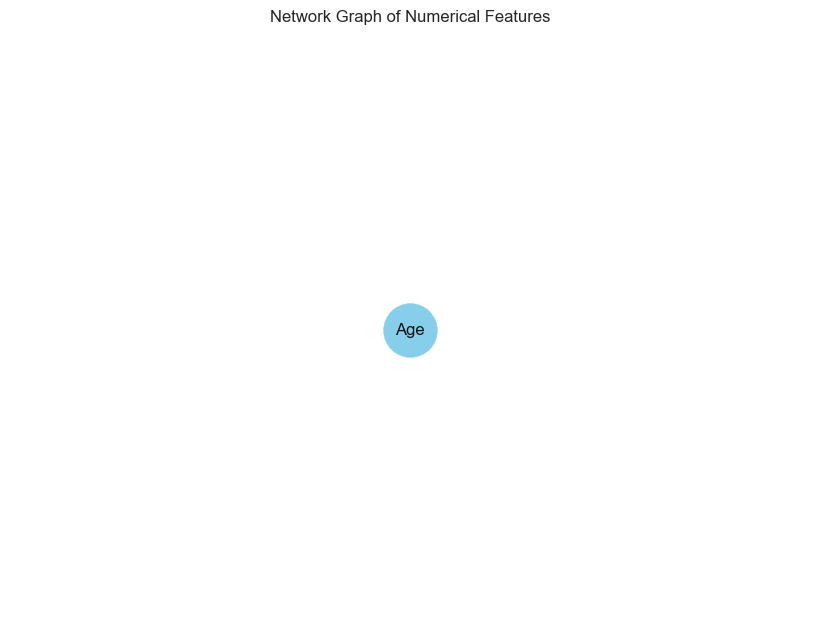

In [99]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("C:\\Users\\sp125\\OneDrive\\Desktop\\feynn docs\\Replication-of-McDonalds-Case-Study-in-Python\\mcdonalds.csv")
# Replace "mcdonalds_dataset.csv" with the actual filename

# Select numerical columns for correlation analysis
numerical_columns = ['Age']  # Add other numerical columns as needed

# Calculate correlation matrix
correlation_matrix = data[numerical_columns].corr().abs()

# Create a graph
G = nx.Graph()

# Add nodes (features)
G.add_nodes_from(numerical_columns)

# Add edges (correlations between features)
edges = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > 0.5:  # Adjust threshold as needed
            edges.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Layout algorithm for arranging nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=12, edge_color='gray', width=1)
plt.title("Network Graph of Numerical Features")
plt.show()


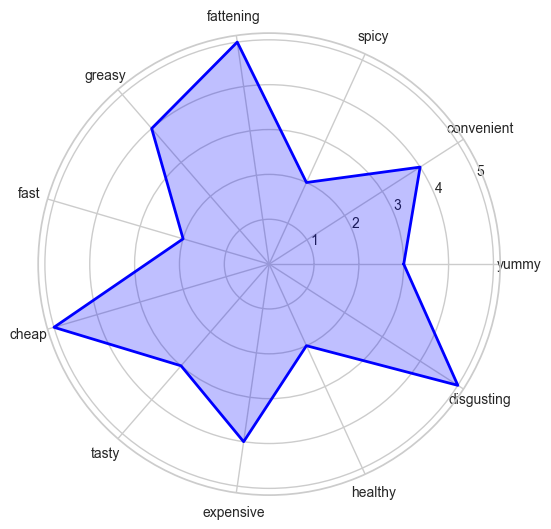

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# Categories from the McDonald's dataset
categories = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Sample values for each category (you can replace these with actual data from your dataset)
values = [3, 4, 2, 5, 4, 2, 5, 3, 4, 2, 5]

# Number of categories
num_categories = len(categories)

# Compute angle for each category
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

# The plot is circular, so we "complete the loop" and append the start to the end.
values += values[:1]
angles += angles[:1]

# Create radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Set labels for each category
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Show radar chart
plt.show()


Extracting the Segments from the above extracted data processes

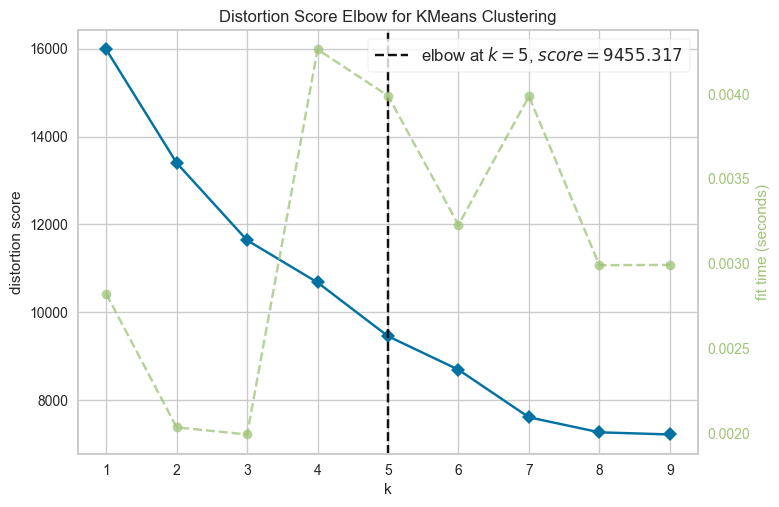

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [101]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Assuming sc_df is defined or replaced with the appropriate dataframe

kmeans_model = KMeans()
visualizer = KElbowVisualizer(kmeans_model, k=(1, 10))
visualizer.fit(sc_df)        
visualizer.show()


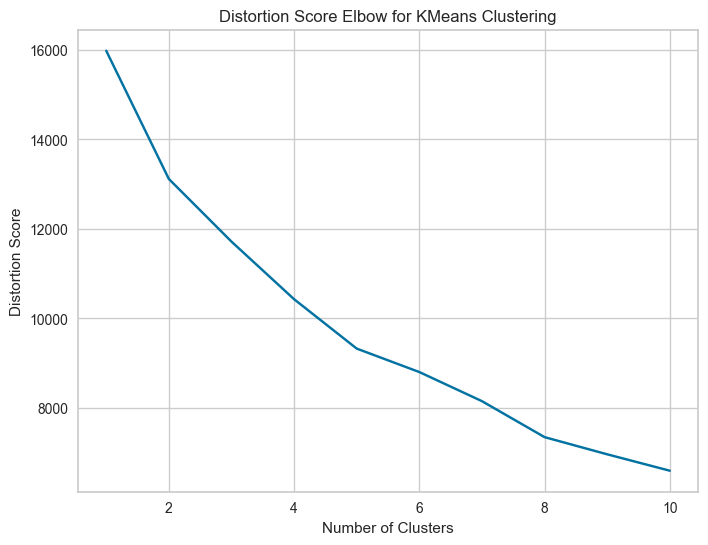

In [102]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
K = range(1, 11)  # Range of clusters to evaluate

# Assuming sc_df is defined or replaced with the appropriate dataframe

for k in K:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(sc_df)
    distortions.append(kmeans_model.inertia_)  # Sum of squared distances to nearest centroid

# Plot the distortion scores
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion Score')
plt.title('Distortion Score Elbow for KMeans Clustering')
plt.show()


In [103]:
from sklearn.cluster import KMeans

# Define the KMeans model with 4 clusters
kmeans = KMeans(n_clusters=4)

# Fit the model and predict the cluster labels
kmeans_labels = kmeans.fit_predict(sc_df)

# Concatenate the cluster labels with the PCA DataFrame
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster': kmeans_labels})], axis=1)


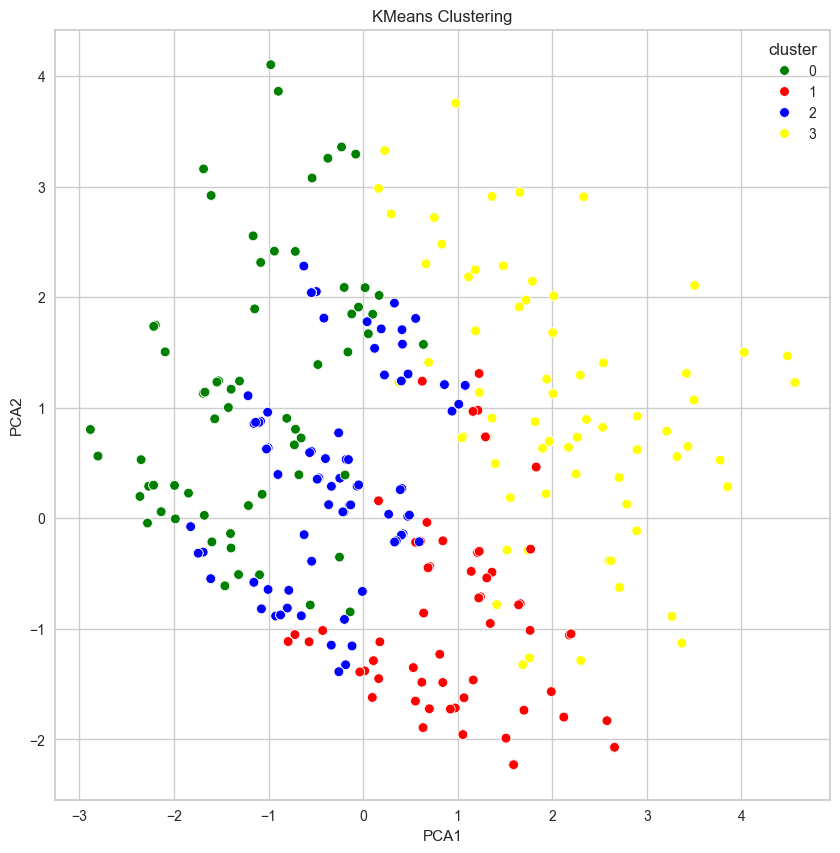

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.scatterplot(x="PCA1", y="PCA2", hue="cluster", data=pca_df_kmeans, palette=['green', 'red', 'blue', 'yellow'])
plt.title("KMeans Clustering")
plt.show()


In [105]:
kmeans = KMeans(4)
kmeans.fit_predict(sc_df)
pca_df_kmeans1 = pd.concat([data1,pd.DataFrame({'cluster':kmeans.labels_})], axis=1)

In [106]:
#sns.countplot(x ='cluster', data = pca_df_kmeans1, palette = "Set1")

C:\Users\sp125\AppData\Local\Temp\ipykernel_15780\1089227363.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=pca_df_kmeans1, palette='Set1')


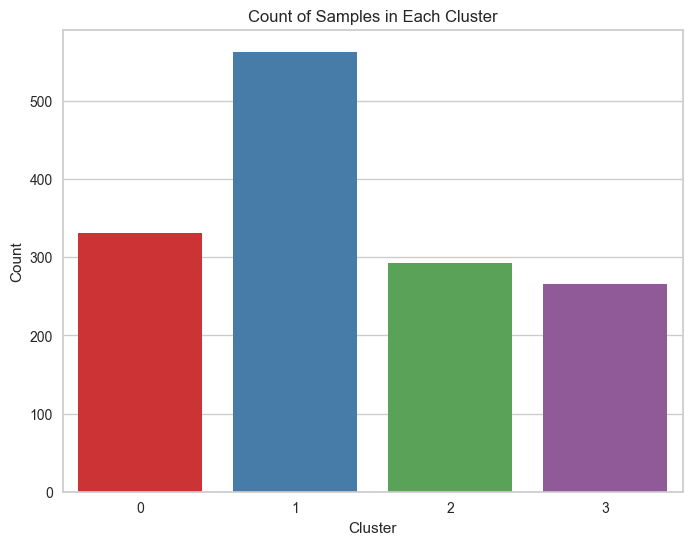

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', data=pca_df_kmeans1, palette='Set1')
plt.title('Count of Samples in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


Profiling the Segments from provided McDonald's datasets and providing the clustering to the following

In [108]:
cluster1 = pca_df_kmeans1[pca_df_kmeans1["cluster"]==0]
cluster2 = pca_df_kmeans1[pca_df_kmeans1["cluster"]==1]
cluster3 = pca_df_kmeans1[pca_df_kmeans1["cluster"]==2]
cluster4 = pca_df_kmeans1[pca_df_kmeans1["cluster"]==3]

C:\Users\sp125\AppData\Local\Temp\ipykernel_15780\3759209384.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  dia = sns.barplot(data=cluster1[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)


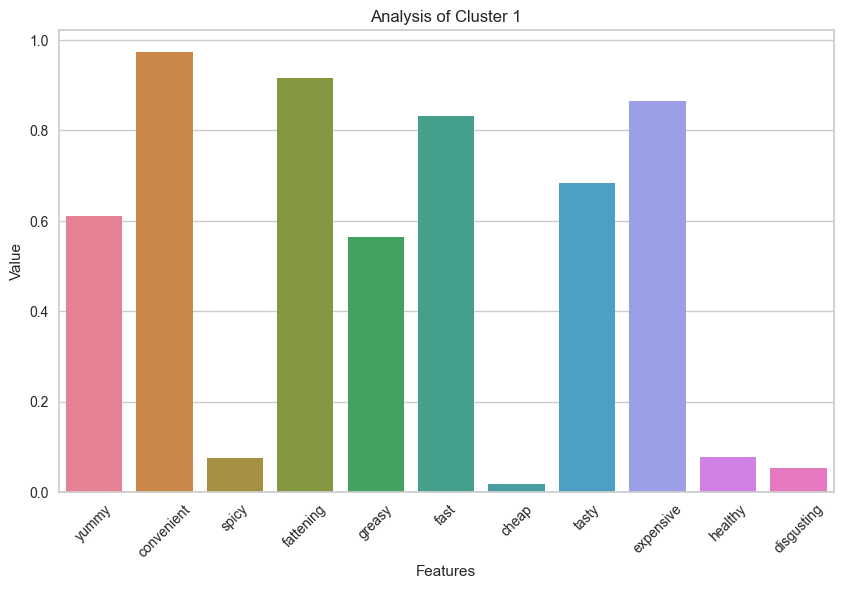

In [109]:
plt.figure(figsize=(10, 6))
dia = sns.barplot(data=cluster1[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('Analysis of Cluster 1')
plt.xlabel('Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


C:\Users\sp125\AppData\Local\Temp\ipykernel_15780\863113600.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  dia = sns.barplot(data=cluster2[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)


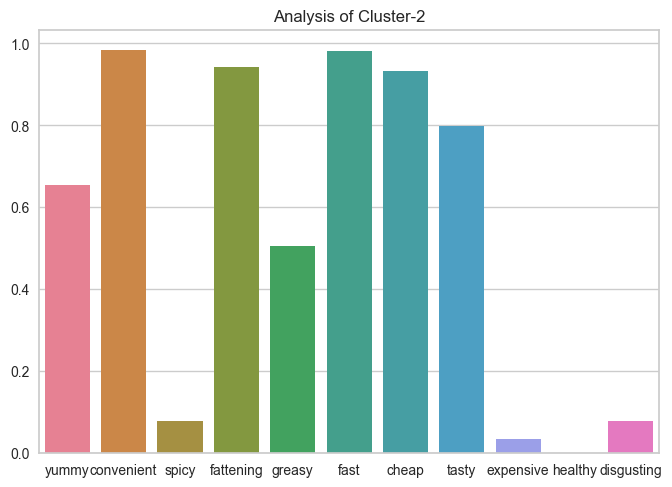

In [110]:
cluster2.head()
dia = sns.barplot(data=cluster2[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('Analysis of Cluster-2')
plt.show()

C:\Users\sp125\AppData\Local\Temp\ipykernel_15780\3972605646.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  dia = sns.barplot(data=cluster3[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)


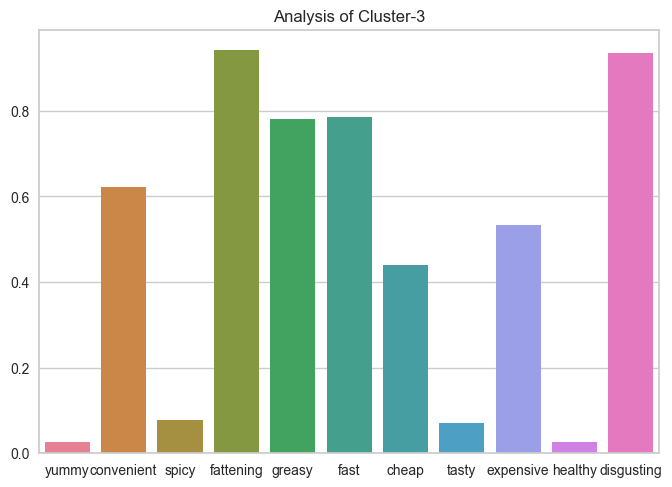

In [111]:
cluster3.head()
dia = sns.barplot(data=cluster3[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('Analysis of Cluster-3')
plt.show()

C:\Users\sp125\AppData\Local\Temp\ipykernel_15780\2420381529.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  dia = sns.barplot(data=cluster4[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)


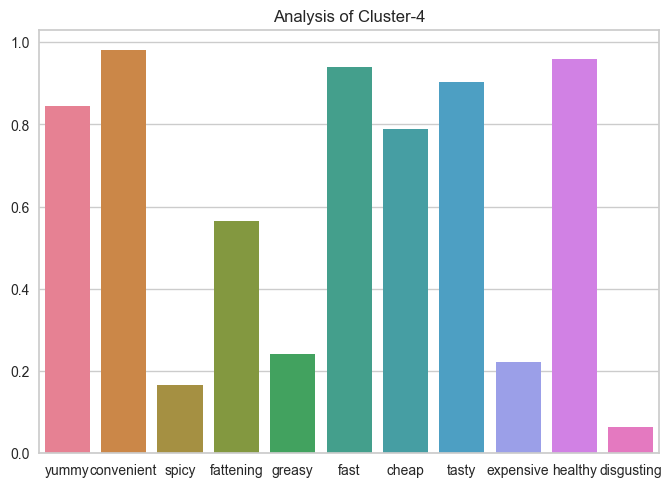

In [112]:
cluster4.head()
dia = sns.barplot(data=cluster4[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('Analysis of Cluster-4')
plt.show()

Describing the Segments of the dataset

In [113]:
data_new= pd.concat([data,pd.DataFrame({'cluster':kmeans.labels_})],axis=1)
data_new.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,0
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,1
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,0
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,1
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,3
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male,1
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female,3
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female,1
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male,2
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female,0


In [114]:
data_new['VisitFrequency'].value_counts()

VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64

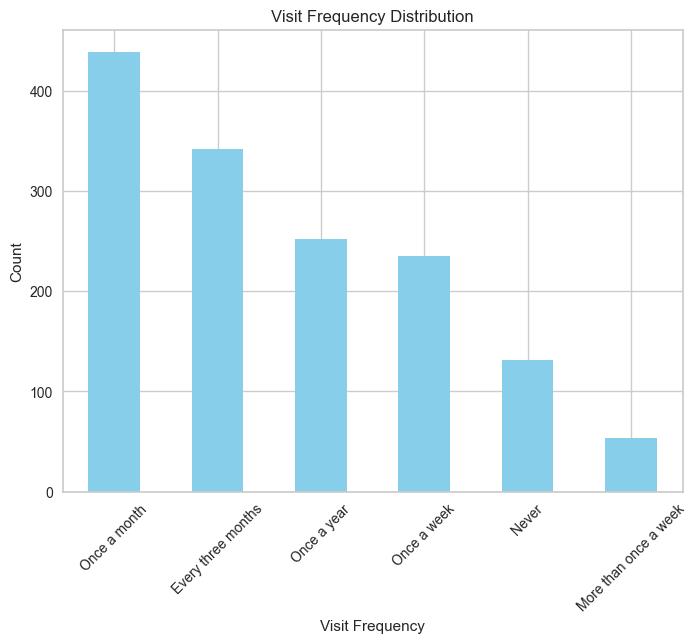

In [115]:
import matplotlib.pyplot as plt

# Calculate the value counts
visit_frequency_counts = data_new['VisitFrequency'].value_counts()

# Plotting the value counts
plt.figure(figsize=(8, 6))
visit_frequency_counts.plot(kind='bar', color='skyblue')
plt.title('Visit Frequency Distribution')
plt.xlabel('Visit Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [116]:
data_new["VisitFrequency"]= data_new["VisitFrequency"].replace({'Never':0, 'Once a year':1, 'Every three months':2, 'Once a month':3, 'Once a week':4, 'Never':5, 'More than once a week':6})

C:\Users\sp125\AppData\Local\Temp\ipykernel_15780\2110564240.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_new["VisitFrequency"]= data_new["VisitFrequency"].replace({'Never':0, 'Once a year':1, 'Every three months':2, 'Once a month':3, 'Once a week':4, 'Never':5, 'More than once a week':6})


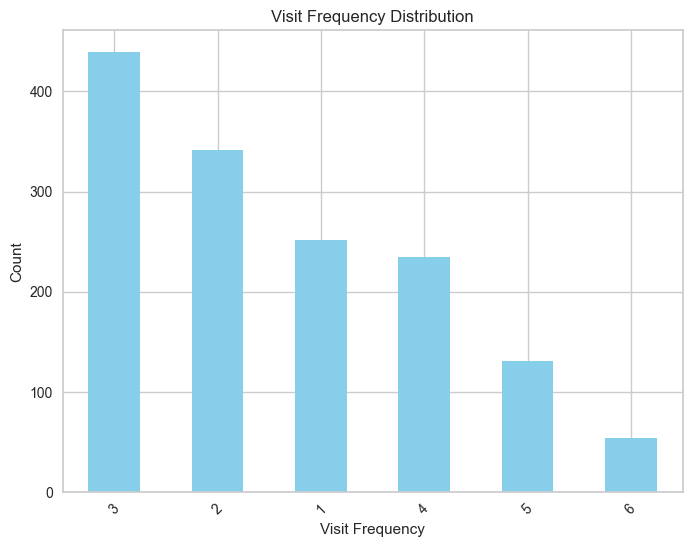

In [117]:
import matplotlib.pyplot as plt

# Calculate the value counts
visit_frequency_counts = data_new['VisitFrequency'].value_counts()

# Plotting the value counts
plt.figure(figsize=(8, 6))
visit_frequency_counts.plot(kind='bar', color='skyblue')
plt.title('Visit Frequency Distribution')
plt.xlabel('Visit Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [118]:
data_new['Like'].value_counts()

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

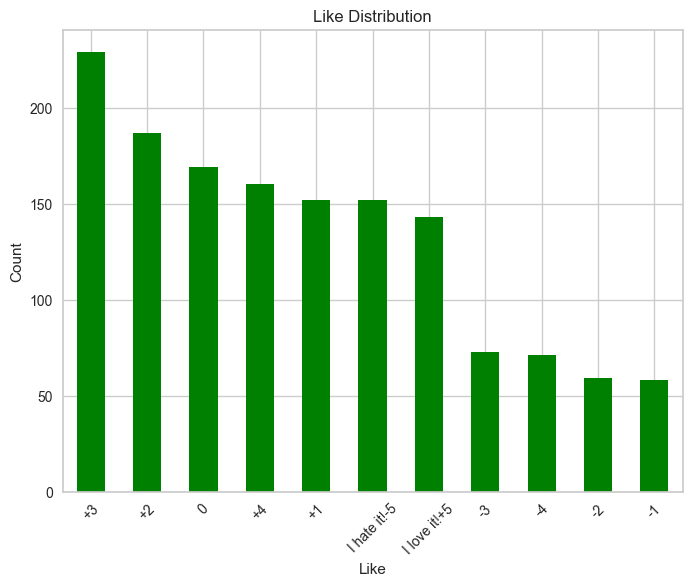

In [119]:
import matplotlib.pyplot as plt

# Calculate the value counts
like_counts = data_new['Like'].value_counts()

# Plotting the value counts
plt.figure(figsize=(8, 6))
like_counts.plot(kind='bar', color='green')
plt.title('Like Distribution')
plt.xlabel('Like')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [120]:
data_new["Like"]= data_new["Like"].replace({'I hate it!-5':0, '-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10})

C:\Users\sp125\AppData\Local\Temp\ipykernel_15780\2875594780.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_new["Like"]= data_new["Like"].replace({'I hate it!-5':0, '-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10})


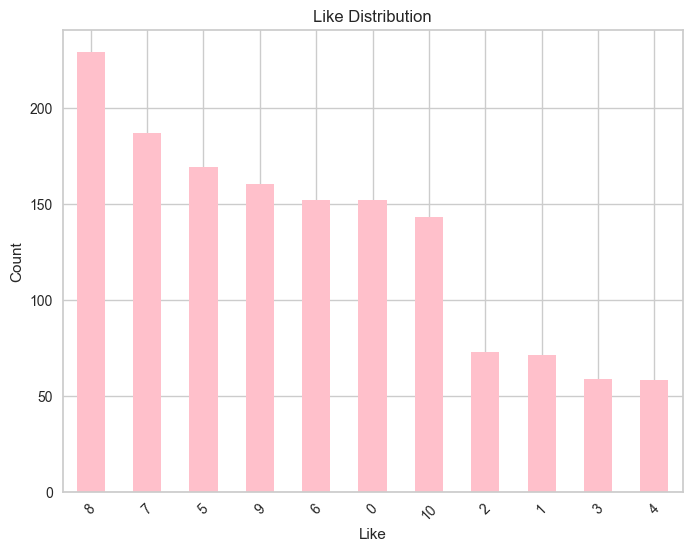

In [121]:
import matplotlib.pyplot as plt

# Calculate the value counts
like_counts = data_new['Like'].value_counts()

# Plotting the value counts
plt.figure(figsize=(8, 6))
like_counts.plot(kind='bar', color='pink')
plt.title('Like Distribution')
plt.xlabel('Like')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [122]:
data_new['Gender'].value_counts()

Gender
Female    788
Male      665
Name: count, dtype: int64

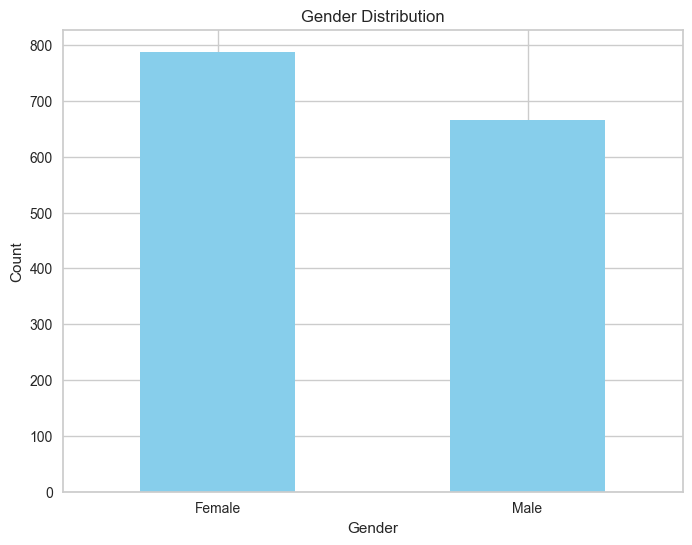

In [123]:
import matplotlib.pyplot as plt

# Calculate the value counts for Gender
gender_counts = data_new['Gender'].value_counts()

# Plotting the value counts
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color='skyblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # No need to rotate x-axis labels if they're already readable
plt.show()


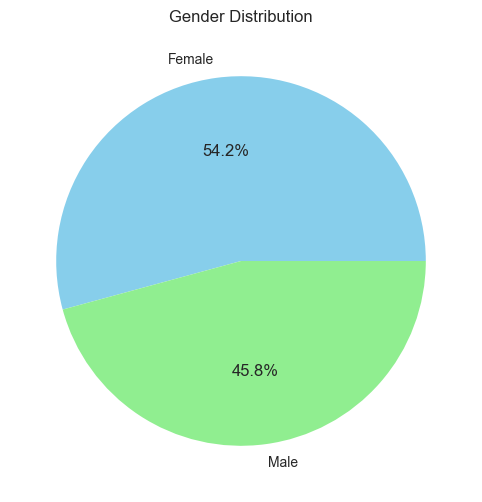

In [124]:
import matplotlib.pyplot as plt

# Calculate the value counts for Gender
gender_counts = data_new['Gender'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])  # Adjust colors as needed
plt.title('Gender Distribution')
plt.show()


In [125]:
data_new["Gender"]= data_new["Gender"].replace({'Female':0, 'Male':1})

C:\Users\sp125\AppData\Local\Temp\ipykernel_15780\1140660659.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_new["Gender"]= data_new["Gender"].replace({'Female':0, 'Male':1})


In [126]:
data_new.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,2,61,2,0,0
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,7,51,2,0,1
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,6,62,2,0,0
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,9,69,4,0,1
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,7,49,3,1,3
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,7,55,2,1,1
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,7,56,2,0,3
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,10,23,4,0,1
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,0,58,1,1,2
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,6,32,2,0,0


<Figure size 1000x800 with 0 Axes>

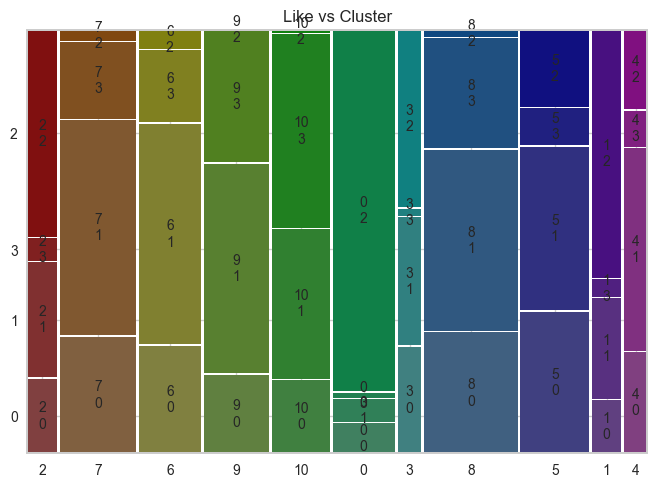

In [127]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Plotting the mosaic plot
plt.figure(figsize=(10, 8))
mosaic(data_new, ['Like', 'cluster'], title='Like vs Cluster')
plt.show()


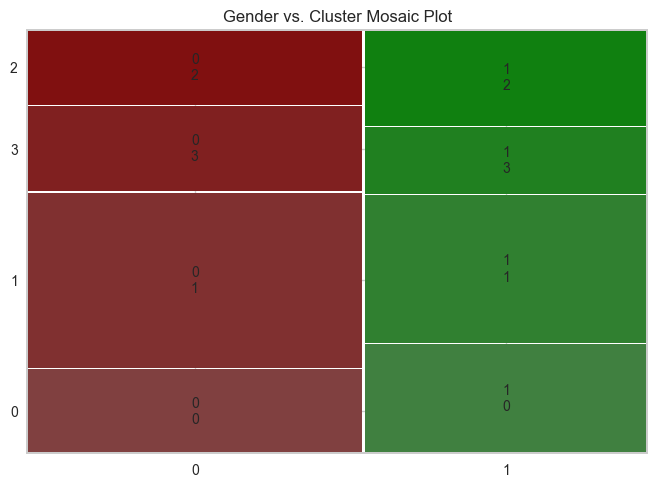

In [128]:
from statsmodels.graphics.mosaicplot import mosaic

# Create the mosaic plot with modified title
mosaic(data_new, ['Gender', 'cluster'], title='Gender vs. Cluster Mosaic Plot')

# Display the plot
plt.show()


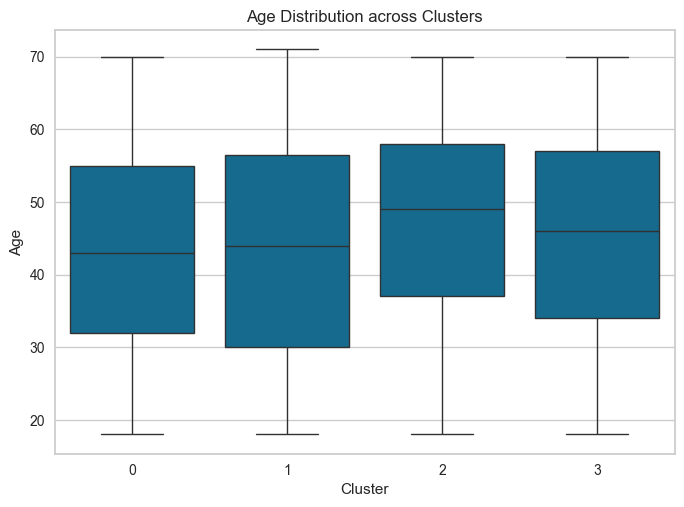

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot
sns.boxplot(x=data_new['cluster'], y=data_new['Age'])

# Add title and labels
plt.title('Age Distribution across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Age')

# Show the plot
plt.show()


Select the Target Segments from the following Dataset

In [130]:
from sklearn.model_selection import train_test_split
X = data_new.drop(['cluster'],axis=1)
Y = data_new[['cluster']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
data_new_encoded = data_new.apply(label_encoder.fit_transform)

# Split features and target variable
X = data_new_encoded.drop(['cluster'], axis=1)
Y = data_new_encoded['cluster']

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the decision tree classifier
classifier = DecisionTreeClassifier(random_state=0)
model = classifier.fit(X_train, Y_train)


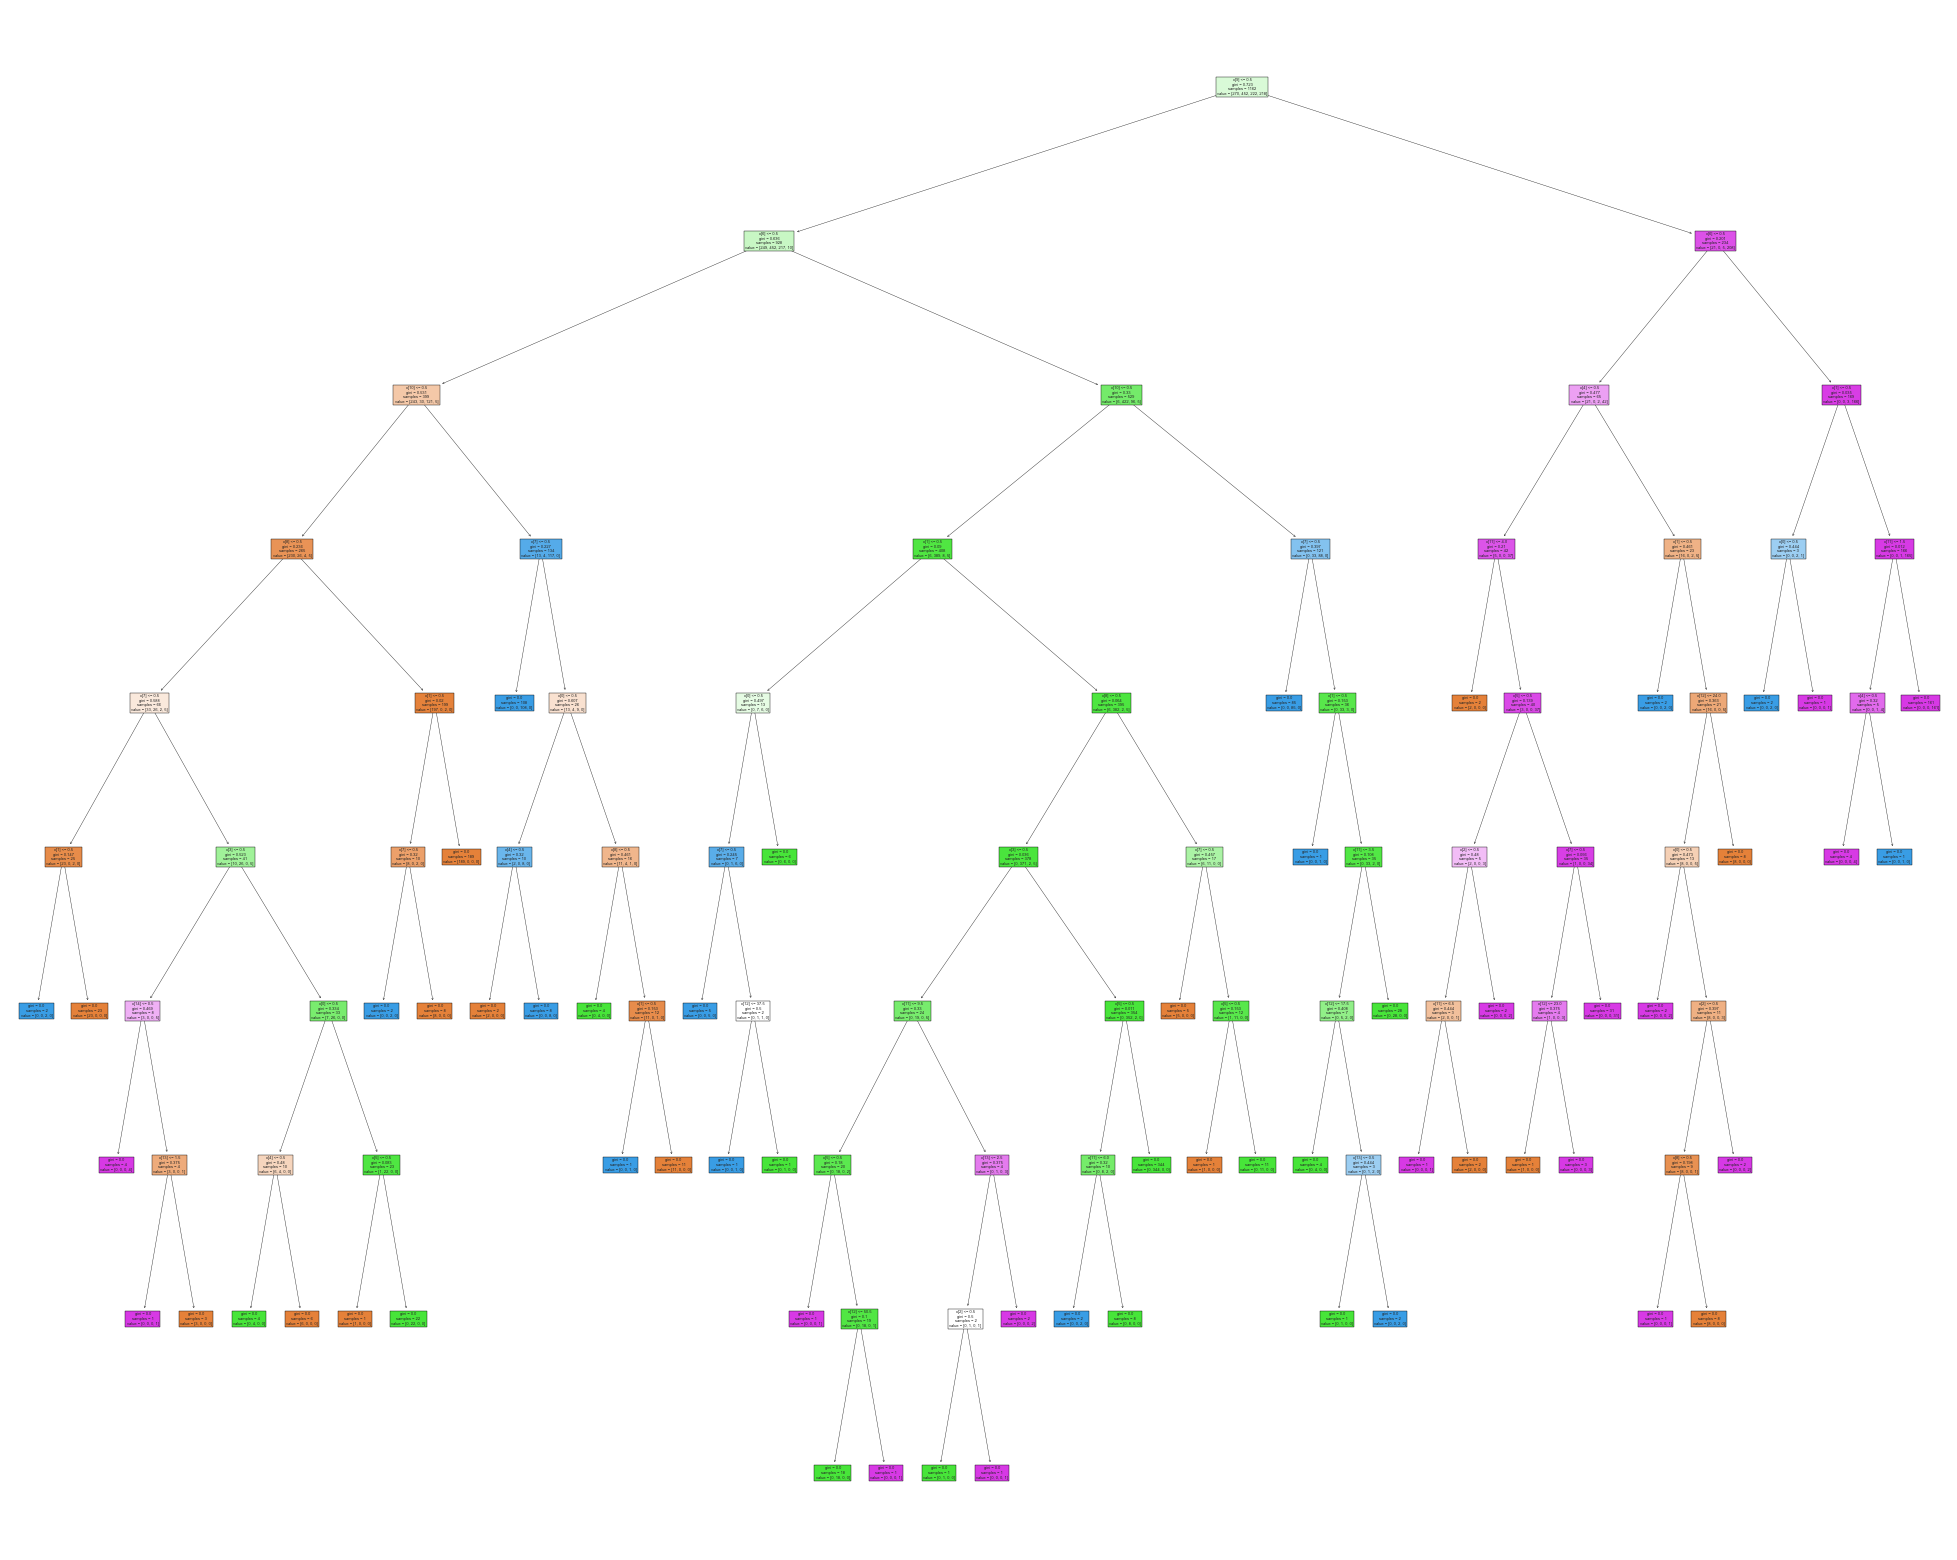

In [132]:
from sklearn import tree
dia = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, filled=True)

Customize the following according to the Marketing segmentation

Evaluate and train the model based on the above analysis

In [133]:
classifier = DecisionTreeClassifier(criterion="entropy")
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [134]:
import pickle
filename = 'classifier.pkl'
pickle.dump(classifier, open(filename, 'wb'))

#again loading the stored model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result*100,'% Accuracy')

96.21993127147766 % Accuracy
